<a href="https://colab.research.google.com/github/mrrahul011/EIP-Session-4/blob/master/GradCam_Result_10Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
from keras import backend as K
import numpy as np
import cv2


Using TensorFlow backend.


In [5]:
from google.colab import files
uploaded = files.upload()

Saving 1.jpg to 1 (3).jpg
Saving 2.jpg to 2 (3).jpg
Saving 3.jpg to 3 (3).jpg
Saving 4.jpg to 4 (3).jpg
Saving 5.jpg to 5 (3).jpg
Saving 6.jpg to 6 (3).jpg
Saving 7.jpg to 7 (3).jpg
Saving 8.jpg to 8 (3).jpg
Saving 9.jpg to 9 (3).jpg
Saving 10.jpg to 10 (3).jpg


In [0]:
model = VGG16(weights="imagenet")
from skimage import io
dog = io.imread("1.jpg")
dog = cv2.resize(dog, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
x = image.img_to_array(dog)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

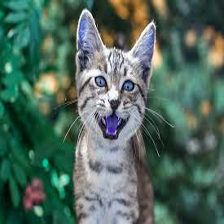

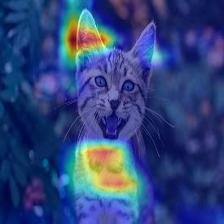

In [92]:
preds = model.predict(x)
class_idx = np.argmax(preds[0])
#print(class_idx)
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block5_conv3")

grads = K.gradients(class_output, last_conv_layer.output)[0]
#print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
#print(pooled_grads.shape)
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis = -1)
#print(conv_layer_output_value.shape)
#print(heatmap.shape)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

heatmap = cv2.resize(heatmap, (dog.shape[1], dog.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(dog, 0.5, heatmap, 0.5, 0)
from google.colab.patches import cv2_imshow
cv2_imshow( dog)
cv2_imshow(superimposed_img)

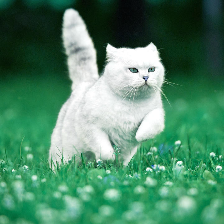

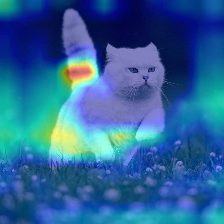

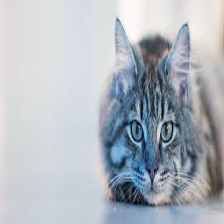

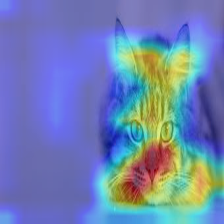

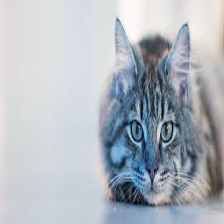

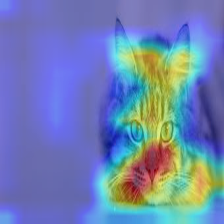

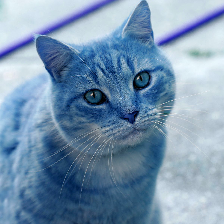

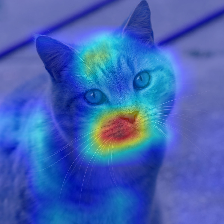

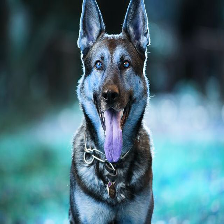

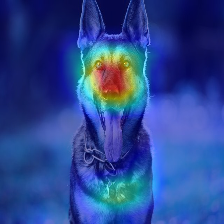

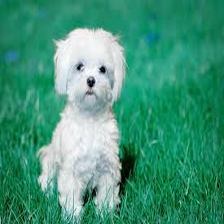

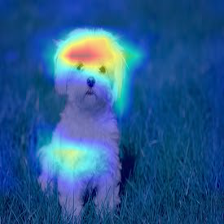

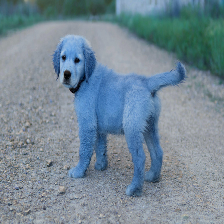

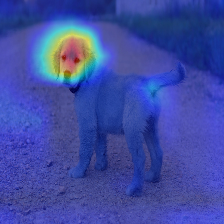

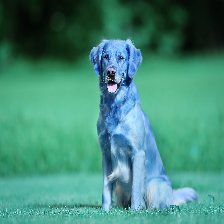

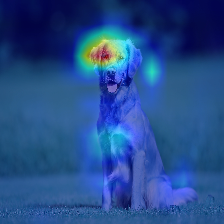

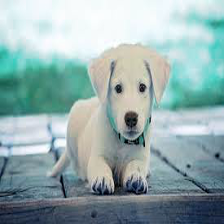

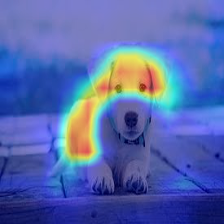